In [1]:
from __future__ import division
import math
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
def Data_gen(n=10):
    TrainSet=[]
    States=["A","B","C","D","E","F","G"]
    startP="D"
    for i in range(n):
        curP=startP
        seq=[curP]
        cur_ind=States.index(curP)
        while cur_ind!=0 and cur_ind!=6:
            cur_ind=States.index(curP)
            rand=random.uniform(0, 1)
            if rand<=0.5:
                cur_ind+=-1
            else:
                cur_ind+=1
            curP=States[cur_ind]
            seq.append(curP)
            
        TrainSet.append(seq)
    return TrainSet

print Data_gen(5)

[['D', 'C', 'B', 'C', 'B', 'A'], ['D', 'E', 'F', 'G'], ['D', 'E', 'D', 'E', 'D', 'C', 'D', 'C', 'B', 'C', 'D', 'E', 'F', 'E', 'F', 'G'], ['D', 'E', 'F', 'E', 'D', 'C', 'B', 'C', 'B', 'C', 'B', 'C', 'D', 'C', 'B', 'C', 'D', 'E', 'F', 'G'], ['D', 'C', 'B', 'A']]


In [3]:
def learn_oneset(Trainset,alpha,lamd,w):
    States=["A","B","C","D","E","F","G"]
    X=[np.array([1,0,0,0,0]),np.array([0,1,0,0,0]),np.array([0,0,1,0,0]),np.array([0,0,0,1,0]),np.array([0,0,0,0,1])]
    test=1
    P_act = np.array([1/6,2/6,3/6,4/6,5/6])

    P = np.zeros(7)
    for s in range(7):
        if s == 0:
            P[s] = 0.0
        elif s == 6:
            P[s] = 1.0
        else:
            px = X[s-1]
            P[s] = np.dot(np.transpose(px),w)
    
    delta_w = np.zeros(5)
    for m in range(len(Trainset)):
        Trainset_use = Trainset[m]
        delta_w = np.zeros(5)
        for i in range(len(Trainset_use)-1):
            ind_1 = States.index(Trainset_use[i])
            ind_2 = States.index(Trainset_use[i+1])
            s1 = np.zeros(5)
            for j in range(i+1):
                s1 += (lamd**(i-j))*X[States.index(Trainset_use[j])-1]
            delta_w += alpha*(P[ind_2]-P[ind_1])*s1
        w += delta_w
        for s in range(7):
            if s == 0:
                P[s] = 0
            elif s == 6:
                P[s] = 1
            else:
                px = X[s-1]
                P[s] = np.dot(np.transpose(px),w)
        delta_w = np.zeros(5)
                
    RMSE = np.linalg.norm(P[1:6]-P_act)/np.sqrt(5)  
    return [w,P,RMSE]


alpha1 = np.arange(0,0.6,0.05)
lamda = np.array([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
#alpha1 = np.arange(0,1,0.01)
#lamda = np.array([0.0])
#lamda = np.array([0.1, 0.3])
lamda_alpha = np.zeros([3,11])
RMSE_total = np.zeros([len(lamda),len(alpha1)])
Trainset = []
for i in range (100):
    data = Data_gen(10)
    Trainset.append(data)

for iter in range(len(lamda)):
    alpha_use = alpha1
    lamda_alpha[0,iter]=lamda[iter]
    for iter2 in range(len(alpha_use)):
        w = np.array([0.5,0.5,0.5,0.5,0.5])
        RMSE_all = np.zeros(100)
        for i in range (100):
            w = np.array([0.5,0.5,0.5,0.5,0.5])
            [weights,P,RMSE] = learn_oneset(Trainset[i],alpha_use[iter2],lamda[iter],w)       
            #RMSE_total[iter,iter2] += RMSE
            RMSE_all[i] += RMSE
        #RMSE_total[iter,iter2] /= 100
        RMSE_total[iter,iter2] = np.mean(RMSE_all)
        if iter2 > 0 and RMSE_total[iter,iter2] < lamda_alpha[2,iter]:
            lamda_alpha[2,iter] = RMSE_total[iter,iter2]
            lamda_alpha[1,iter] = alpha_use[iter2]
        elif iter2 == 0:
            lamda_alpha[1,iter] = alpha_use[iter2]
            lamda_alpha[2,iter] = RMSE_total[iter,iter2]


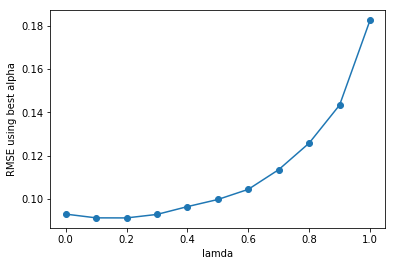

In [4]:
plt.plot(lamda_alpha[0,],lamda_alpha[2,], marker='o')
plt.xlabel('lamda')
plt.ylabel('RMSE using best alpha')
plt.show()


In [5]:
print RMSE_total

[[0.23570226 0.17517033 0.13168796 0.10416963 0.09305335 0.10373842
  0.15088801 0.275296   0.57728481 1.28852158 2.91031391 6.43094604]
 [0.23570226 0.17234451 0.12812118 0.10139524 0.09132432 0.0986445
  0.12836977 0.19838521 0.3582041  0.71228662 1.47948865 3.07006431]
 [0.23570226 0.16941374 0.12469666 0.09925457 0.09129557 0.09875057
  0.12099365 0.16602639 0.25933475 0.45651168 0.85824678 1.65269008]
 [0.23570226 0.16638704 0.1215346  0.09797639 0.09291082 0.10225223
  0.12151004 0.15454947 0.21666701 0.3385911  0.57198543 1.00443373]
 [0.23570226 0.16329961 0.11884689 0.09795086 0.09651388 0.10848235
  0.12718314 0.15432759 0.20062213 0.28436747 0.43540627 0.69728175]
 [0.23570226 0.16023281 0.11699503 0.0997967  0.1027156  0.11757618
  0.13696384 0.16139529 0.1997984  0.26438402 0.37395473 0.55325772]
 [0.23570226 0.15735615 0.1166043  0.1044846  0.11246481 0.13019336
  0.15086048 0.17478769 0.20990496 0.26583524 0.35531541 0.495217  ]
 [0.23570226 0.15503142 0.11880737 0.11357